In [1]:
import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
import pandas as pd
import os
from Scripts import velocityCalculations as vel


In [2]:
path = '/Users/adithyaiyer/Desktop/ac2d/'
list_files = os.listdir(path)
list_files.sort()
j = 0
for i in list_files:
    list_files[j] = path+i
    j = j+1


In [3]:
list_files

['/Users/adithyaiyer/Desktop/ac2d/time_000100.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_000200.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_000300.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_000400.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_000500.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_000600.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_000700.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_000800.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_000900.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_001000.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_001100.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_001200.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_001300.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_001400.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_001500.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_001600.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_001700.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_001800.dat',
 '/Users/adithyaiyer/Desktop/ac2d/time_001900.dat',
 '/Users/adi

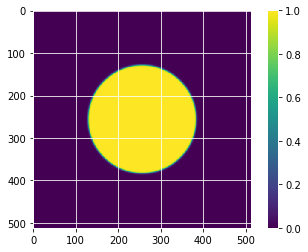

50856.54917035102


In [4]:
img_ = corr.dat_to_numpy(list_files[600])
plt.imshow(img_)
plt.colorbar()
plt.show()
print(np.sum(img_))

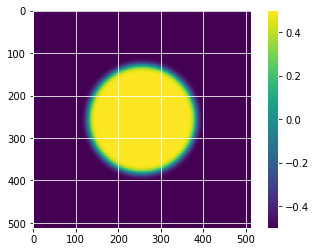

In [5]:
plt.imshow(vel.image_preprocessing(img_))
plt.colorbar()

In [6]:
velocity_mag = vel.velocityMagnitude(list_files, 600, 2)

velocity in pixels per time step of image aquisition (of image frequency)


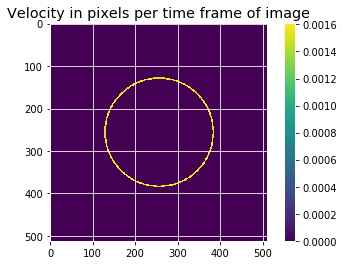

In [7]:

a = (velocity_mag)
where_are_NaNs = np.isnan(a)
a[where_are_NaNs] = 0
plt.title('Velocity in pixels per time frame of image')
plt.imshow(a)
plt.colorbar()


In [8]:
listy =(a.flatten().tolist())
A =[]
for i in listy:
    if i!=-15 and i<0.0004  :
        A.append(i)
   
A.sort()
len(A)

259208

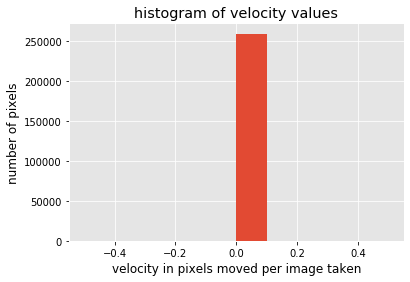

In [9]:
x =plt.hist(A, bins = 10) 
plt.title("histogram of velocity values") 
plt.xlabel('velocity in pixels moved per image taken')
plt.ylabel('number of pixels')
plt.show()

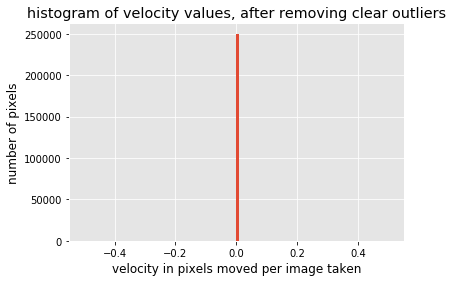

In [10]:

x =plt.hist(A[0:250000], bins = 100) 
plt.title("histogram of velocity values, after removing clear outliers") 
plt.xlabel('velocity in pixels moved per image taken')
plt.ylabel('number of pixels')
plt.show()

In [11]:
velocity_direction = vel.velocityDirection(list_files, 600, 2)


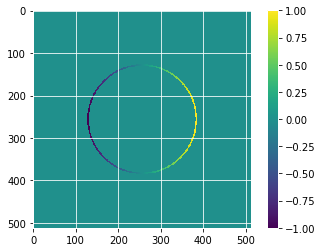

In [12]:
where_are_NaNs = np.isnan(velocity_direction[1])
velocity_direction[1][where_are_NaNs] = 0

where_are_NaNs = np.isnan(velocity_direction[0])
velocity_direction[0][where_are_NaNs] = 0

plt.imshow(velocity_direction[1])

plt.colorbar()

In [13]:
x = np.zeros((64,64))
y = np.zeros((64,64))
             
for i in range(0,64):
    for j in range(0,64):
        if np.max(velocity_direction[0][i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            x[i][j] = np.min(velocity_direction[0][i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            x[i][j] = np.max(velocity_direction[0][i*8:(i+1)*8,j*8:(j+1)*8])
        if np.max(velocity_direction[1][i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            y[i][j] = np.min(velocity_direction[1][i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            y[i][j] = np.max(velocity_direction[1][i*8:(i+1)*8,j*8:(j+1)*8])
        
        

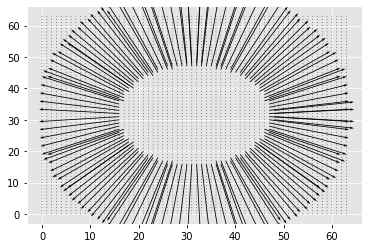

In [14]:
Fx = y
Fy = x
x_ = np.arange(0,64)
y_ = np.arange(0,64)

M = np.sqrt(x*x+y*y)
X, Y = np.meshgrid(x_,y_)
qq =plt.quiver(X, Y, Fx, Fy,)

plt.show()


In [15]:
a = ((velocity_mag))

velocity_value_x = a*velocity_direction[0]
velocity_value_y = a*velocity_direction[1]

In [16]:
x = np.zeros((64,64))
y = np.zeros((64,64))
             
for i in range(0,64):
    for j in range(0,64):
        if np.max(velocity_value_x[i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            x[i][j] = np.min(velocity_value_x[i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            x[i][j] = np.max(velocity_value_x[i*8:(i+1)*8,j*8:(j+1)*8])
        if np.max(velocity_value_y[i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            y[i][j] = np.min(velocity_value_y[i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            y[i][j] = np.max(velocity_value_y[i*8:(i+1)*8,j*8:(j+1)*8])

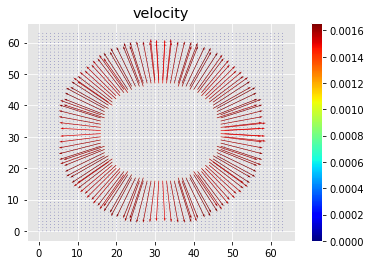

In [17]:
Fx = y
Fy = x
x_ = np.arange(0,64)
y_ = np.arange(0,64)

M = np.sqrt(x*x+y*y)
X, Y = np.meshgrid(x_,y_)

#plt.axes([0.065, 0.065, 0.9, 0.9])
plt.quiver(X, Y, Fx, Fy,M,scale = 0.01,cmap=plt.cm.jet)
plt.colorbar()
plt.title('velocity')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [18]:
np.max(M)

0.0016539096751663925